In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

In [27]:
portfolio_run_dir = r'../data/simulations/portfolio_simulations_monte_carlo'


In [68]:
# Configs
n = 3
percentile_ = 0.95

fnames = os.listdir(portfolio_run_dir)

In [69]:
dfs = []
for fn in tqdm(fnames):
    rundf = pd.read_csv(os.path.join(portfolio_run_dir,fn), header=None)
    rundf = rundf.drop_duplicates()
    rundf['sharpe'] = rundf[25]/rundf[26]
    percentile_threshold = rundf['sharpe'].quantile(percentile_)
    rundf = rundf[rundf['sharpe']>=percentile_threshold]
    
    dfs.append(rundf)

finaldf = pd.concat([df.iloc[:,:25] for df in dfs], ignore_index=True)
finaldf_wts = finaldf.groupby(list(finaldf.columns)).size().reset_index(name='wt')
print(finaldf_wts['wt'].unique())
max_wt = max(finaldf_wts['wt'].unique())
trow = finaldf_wts[finaldf_wts['wt']==max_wt]
print(len(trow))

100%|████████████████████████████████████████████████████████████████████████████████| 350/350 [01:14<00:00,  4.67it/s]


[ 27  33  34  31  26  17  16  30  32  37  24  39  28  35  40  42  41  38
  43  29  45  46  44  36  23  25  22  21  19  20  18  57  58  60  48  53
  64  66  50  55  12  56  52  61  14  59  65  13  49  15  68  67  63  72
  69  75  76  70  78  71  74  77  80  73  51  54  11  47   9   6   7   5
  10   8   4  81  82  83  62  84  90  87  88  89  92  94  93  91  79  85
   2   3   1  86 102  99 100 105  96  97 104 103  98 110  95 107 106 115
 101 109 119 108 118 112 114 113 111 117 116]
4


In [70]:
wt_list = finaldf_wts['wt'].unique()
wt_list.sort()
len(wt_list)

119

In [71]:
for i in range(1,len(wt_list)):
    t_wt = wt_list[-1*i]
    
    trow = finaldf_wts[finaldf_wts['wt']==t_wt]
    print(t_wt, len(trow))
    if len(trow)>=100:
        break

119 4
118 3
117 12
116 12
115 9
114 17
113 19
112 20
111 24
110 18
109 25
108 22
107 25
106 23
105 23
104 31
103 29
102 32
101 23
100 25
99 35
98 32
97 35
96 40
95 38
94 41
93 33
92 46
91 43
90 41
89 46
88 50
87 48
86 54
85 53
84 45
83 59
82 48
81 60
80 68
79 70
78 75
77 85
76 76
75 75
74 80
73 77
72 93
71 88
70 81
69 106


In [72]:
t_wt

69

In [73]:
max_wt = max(finaldf_wts['wt'].unique())
trow = finaldf_wts[finaldf_wts['wt']==t_wt]
print(len(trow))

106


In [74]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

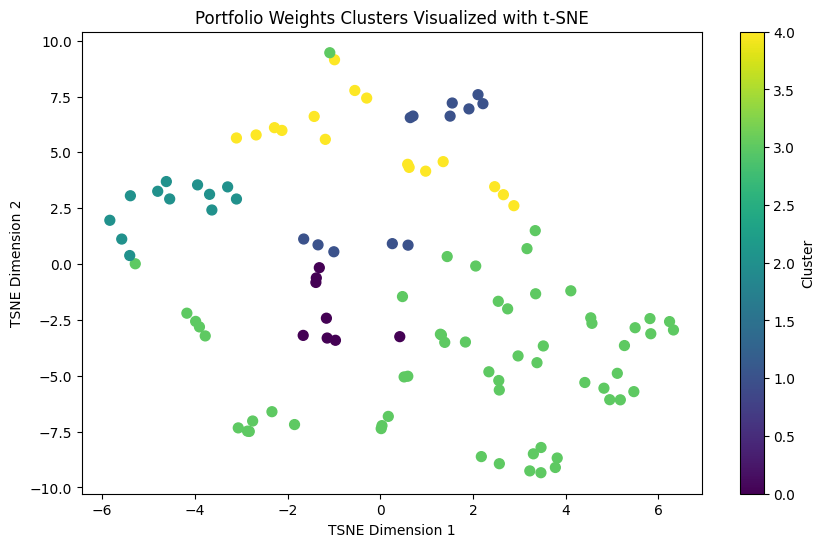

In [75]:
np.random.seed(42)
df = trow.iloc[:,:25]

df_scaled = df

# Step 2: Apply K-Means clustering
n_clusters = 5  # Number of clusters (can adjust as needed)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Step 3: Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

# Step 4: Create a DataFrame with the 2D t-SNE results and the cluster labels
df_visualization = pd.DataFrame(df_tsne, columns=['TSNE1', 'TSNE2'])
df_visualization['Cluster'] = cluster_labels

# Step 5: Plot the clusters in 2D with different colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_visualization['TSNE1'], df_visualization['TSNE2'], c=df_visualization['Cluster'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster')
plt.title('Portfolio Weights Clusters Visualized with t-SNE')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.show()

In [55]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
987,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.24,0.0,0.0,0.55,0.00,0.21,0.00
1321,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.52,0.0,0.0,0.37,0.11,0.00,0.00
1339,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.56,0.0,0.0,0.00,0.25,0.00,0.18
2332,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.09,0.00,0.48,0.0,0.0,0.43,0.00,0.00,0.00
2344,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.10,0.00,0.41,0.0,0.0,0.00,0.00,0.00,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55364,0.00,0.46,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.07,0.0,0.0,0.00,0.00,0.00,0.47
55365,0.00,0.46,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.10,0.0,0.0,0.00,0.00,0.00,0.44
56163,0.00,0.56,0.0,0.0,0.00,0.0,0.0,0.0,0.37,0.0,...,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.07
57116,0.02,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.72,0.0,...,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00


In [56]:
cluster_labels

array([4, 4, 4, 4, 4, 1, 1, 4, 1, 4, 4, 4, 4, 0, 0, 0, 4, 1, 4, 1, 1, 2,
       2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 2, 1, 2, 2, 1, 0, 4, 4, 4, 1, 2, 2, 3, 3, 4, 2, 3, 2, 1,
       4, 4, 2, 1, 2, 2, 1, 1, 1, 2, 2, 3])

In [57]:
final_df = df_scaled.copy()
final_df['cluster'] = cluster_labels
final_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,cluster
987,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.24,0.0,0.0,0.55,0.00,0.21,0.00,4
1321,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.52,0.0,0.0,0.37,0.11,0.00,0.00,4
1339,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.56,0.0,0.0,0.00,0.25,0.00,0.18,4
2332,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.09,0.00,0.48,0.0,0.0,0.43,0.00,0.00,0.00,4
2344,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.10,0.00,0.41,0.0,0.0,0.00,0.00,0.00,0.48,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55364,0.00,0.46,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.07,0.0,0.0,0.00,0.00,0.00,0.47,1
55365,0.00,0.46,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.00,0.10,0.0,0.0,0.00,0.00,0.00,0.44,1
56163,0.00,0.56,0.0,0.0,0.00,0.0,0.0,0.0,0.37,0.0,...,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.07,2
57116,0.02,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.72,0.0,...,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,2


In [58]:
final_df.to_clipboard()
